In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv

In [29]:
def filter(img, kernel):
    image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    arr = np.array([])
    for j in range(image.shape[0]):
        if ((j+kernel.shape[0]) > image.shape[0]):
            break
        else:

            for k in range(image.shape[1]):
                if ((k+kernel.shape[0]) > image.shape[1]):
                    break
                else:
                    s = 0

                    for i in range (image.shape[2]):

                        mult = np.multiply(image[j:j+kernel.shape[0],k:k+kernel.shape[0],i],kernel)
                        s = s + np.sum(mult)
                arr = np.append(arr, s)
    new_img = arr.reshape(image.shape[0]-kernel.shape[0]+1,image.shape[1]-kernel.shape[0]+1)
    return (new_img)

In [30]:
img = cv.imread('img1.png')
Laplacian_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])


In [31]:
Laplacian_img = filter(img, Laplacian_kernel)

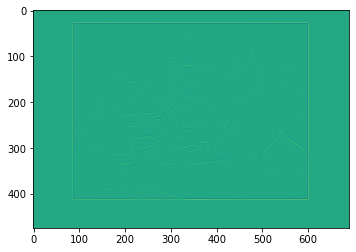

In [36]:
plt.imshow(new_img1)
plt.show()

In [ ]:
Laplacian_img= cv.imwrite('Laplacian_edge.jpg', Laplacian_img )

In [37]:
blur_kernel = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

In [38]:
blur_img = filter(img,blur_kernel)

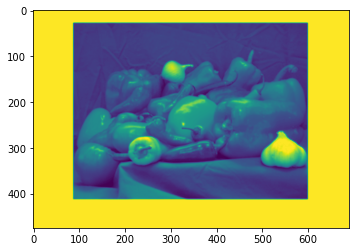

In [39]:
plt.imshow(blur_img)
plt.show()

In [40]:
blur_img = cv.imwrite('blur.jpg', blur_img )

In [41]:
Gaussian_blur_kernel = np.array([[1/16,1/8,1/16],[1/8,1/4,1/8],[1/16,1/8,1/16]])

In [43]:
Gaussian_blur_img = filter(img,Gaussian_blur_kernel)

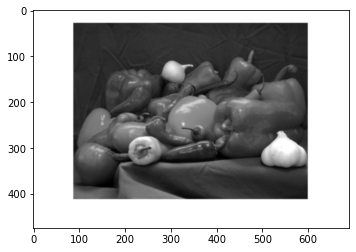

In [46]:
plt.imshow(Gaussian_blur_img, cmap = 'gray')
plt.show()

In [47]:
Gaussian_blur_img = cv.imwrite('Gaussian_blur.jpg', Gaussian_blur_img )

In [49]:
sharp_kernel =  np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

In [50]:
sharp_img = filter(img,sharp_kernel)

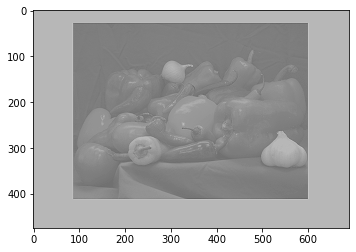

In [51]:
plt.imshow(sharp_img, cmap = 'gray')
plt.show()

In [52]:
sharp_img = cv.imwrite('sharp.jpg', sharp_img )